In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams as rc

rc['figure.figsize'] = 20, 10
rc['axes.titlesize'] = 18
rc['axes.labelsize'] = 14
rc['xtick.labelsize'] = 14
rc['ytick.labelsize'] = 14
rc['legend.fontsize'] = 12
rc['figure.facecolor'] = '#00000000'

sns.color_palette("rocket", as_cmap=True)
sns.set_style('darkgrid')

# Looking at data and potential cleaning

In [2]:
ab = pd.read_csv('AB_NYC_2019.csv')
ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# check for nan
ab.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
ab.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# get all rows with nan values with the exception of nan values in last_review and reviews_per_month
# https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
ab[ab.loc[:, ~ab.columns.isin(['last_review', 'reviews_per_month'])].isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0


# EDA

<AxesSubplot:xlabel='price', ylabel='Count'>

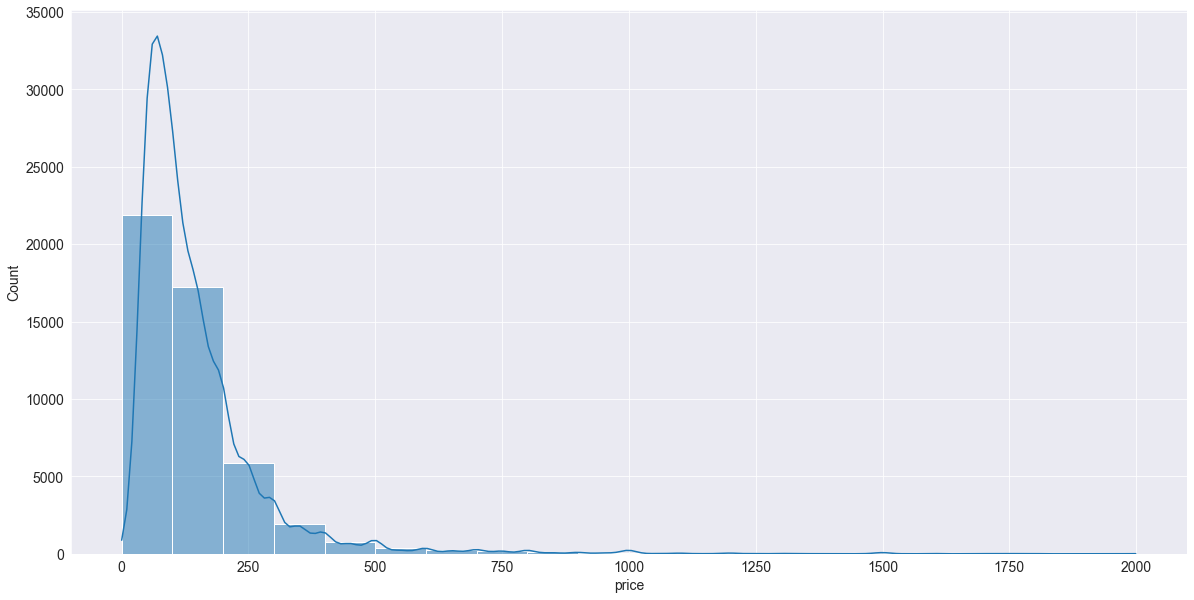

In [6]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
# histogram plot for price less than 2000
sns.histplot(data=ab[ab['price'] < 2000]['price'], binwidth=100, kde=True)

### => Prices are skewed but fall in between the range of 250$ per night

<AxesSubplot:xlabel='room_type', ylabel='Count'>

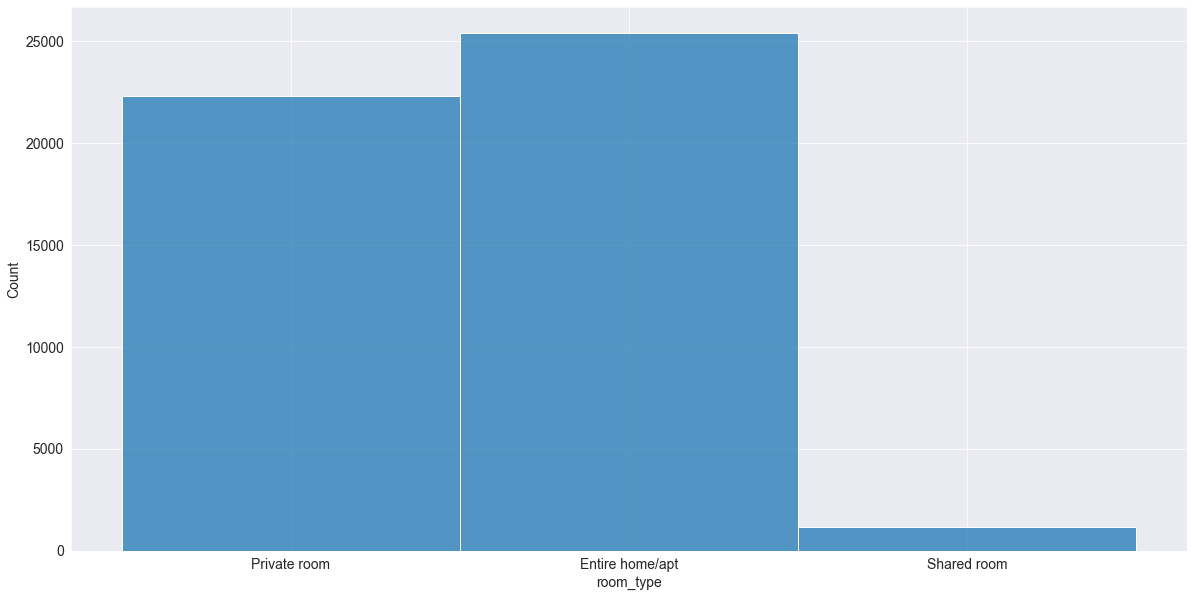

In [7]:
sns.histplot(ab['room_type'])

<AxesSubplot:xlabel='id', ylabel='price'>

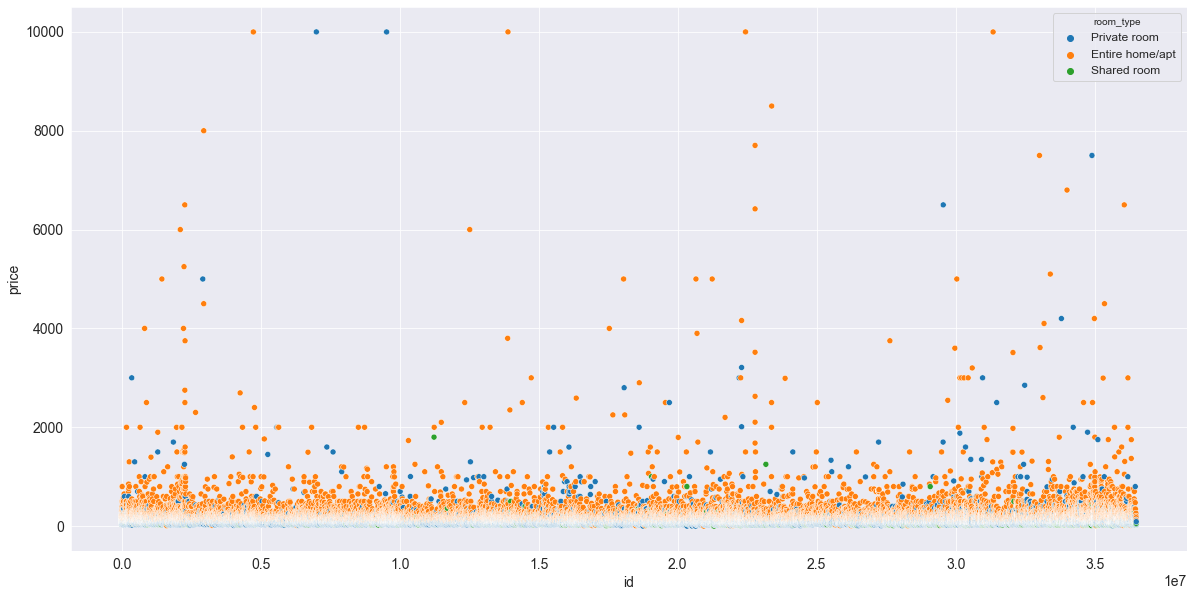

In [8]:
sns.scatterplot(data=ab, x='id',y='price', hue='room_type')

In [9]:
avg_ent = ab[ab['room_type']=='Entire home/apt']['price'].mean()
avg_pri = ab[ab['room_type']=='Private room']['price'].mean()
print(f"Average price for entire home and private room: {avg_ent=} | {avg_pri=}")

Average price for entire home and private room: avg_ent=211.79424613325986 | avg_pri=89.78097285675894


### => Private room is most likely the cheaper option

## Where should I stay?

In [10]:
ab['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='Count'>

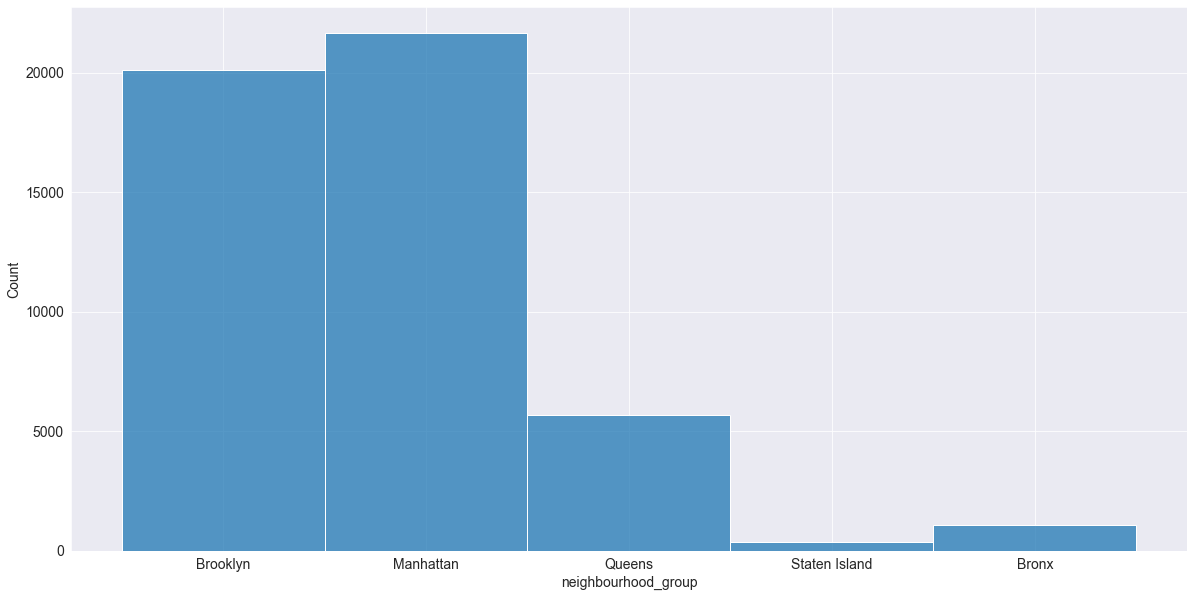

In [11]:
sns.histplot(data=ab, x='neighbourhood_group')

In [12]:
manhat = ab[ab['neighbourhood_group'] == 'Manhattan']
manhat.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


<AxesSubplot:xlabel='id', ylabel='price'>

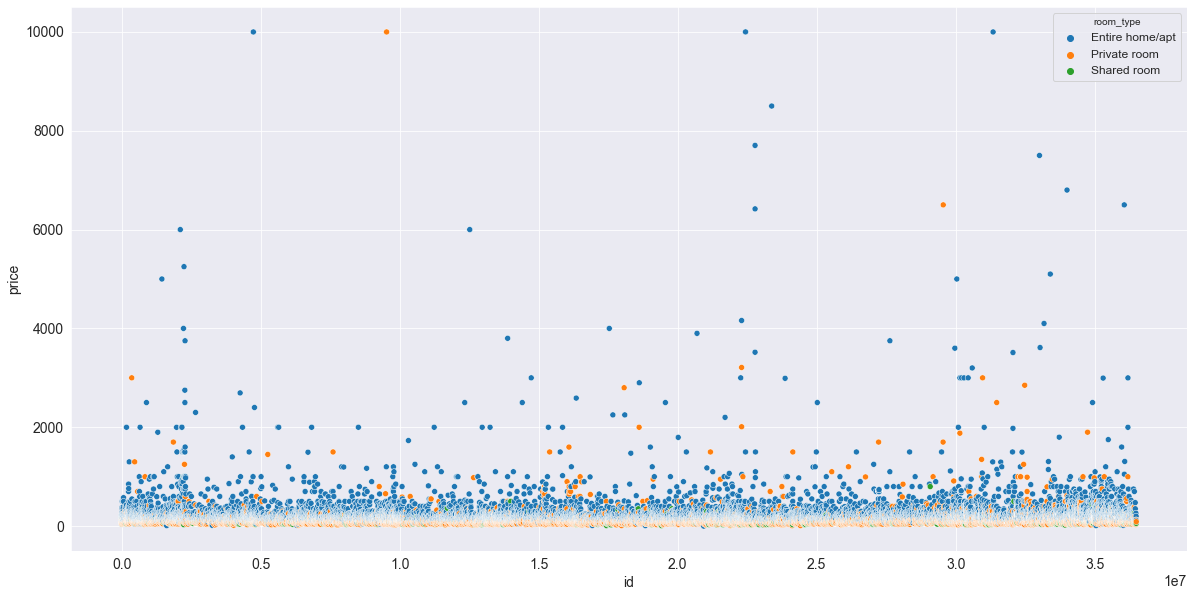

In [13]:
sns.scatterplot(data=manhat, x='id', y='price', hue='room_type')

In [14]:
manhat.groupby(by=["room_type"])['price'].mean()

room_type
Entire home/apt    249.239109
Private room       116.776622
Shared room         88.977083
Name: price, dtype: float64

# Predictive modeling

In [15]:
train_data = ab[['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'availability_365', 'price']].dropna()
train_data.isnull().sum()

neighbourhood_group    0
latitude               0
longitude              0
room_type              0
minimum_nights         0
number_of_reviews      0
availability_365       0
price                  0
dtype: int64

In [16]:
import sklearn
from sklearn import preprocessing

In [17]:
room_type_le = preprocessing.LabelEncoder()
train_data['room_type'] = room_type_le.fit_transform(train_data['room_type'])

In [18]:
room_type_le = preprocessing.LabelEncoder()
train_data['neighbourhood_group'] = room_type_le.fit_transform(train_data['neighbourhood_group'])

In [19]:
from sklearn.model_selection import train_test_split

<AxesSubplot:>

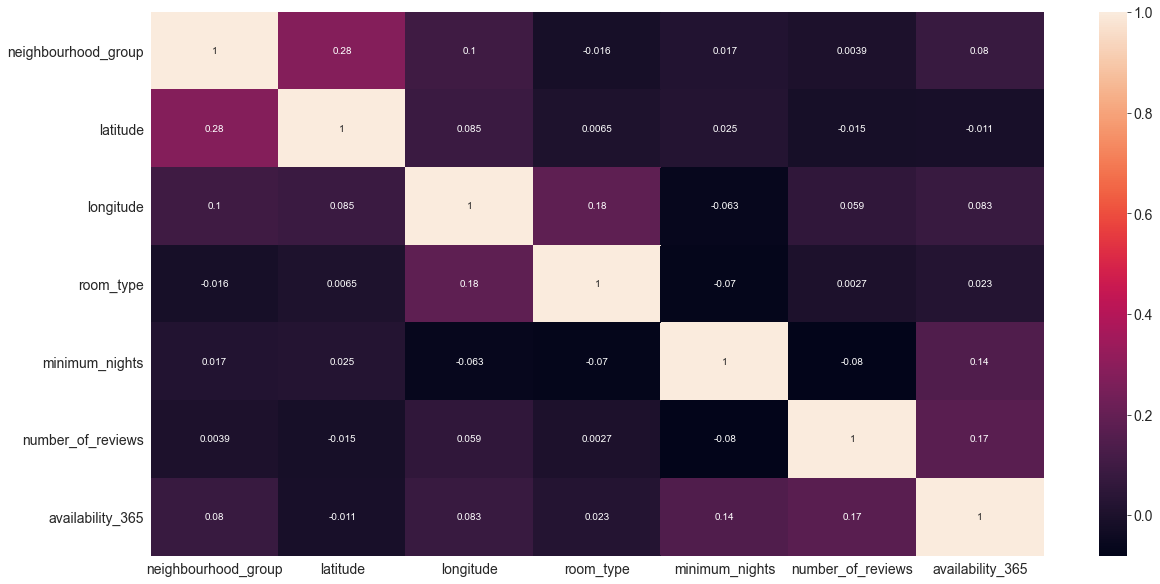

In [20]:
X = train_data[['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'availability_365']]
y = train_data['price']
corr = X.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

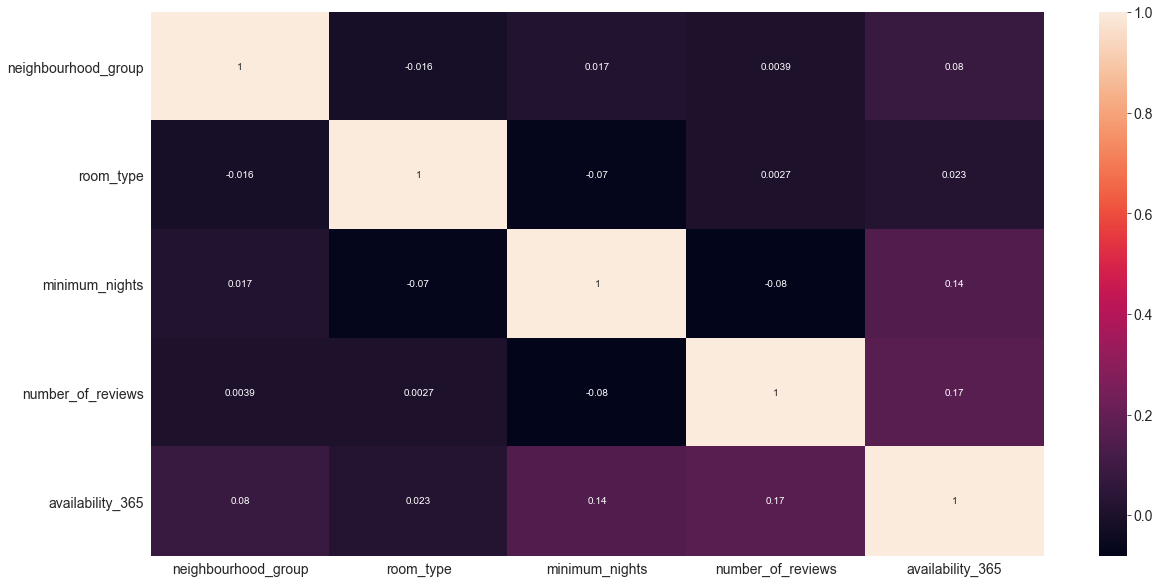

In [21]:
X = train_data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'availability_365']]
y = train_data['price']
corr = X.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

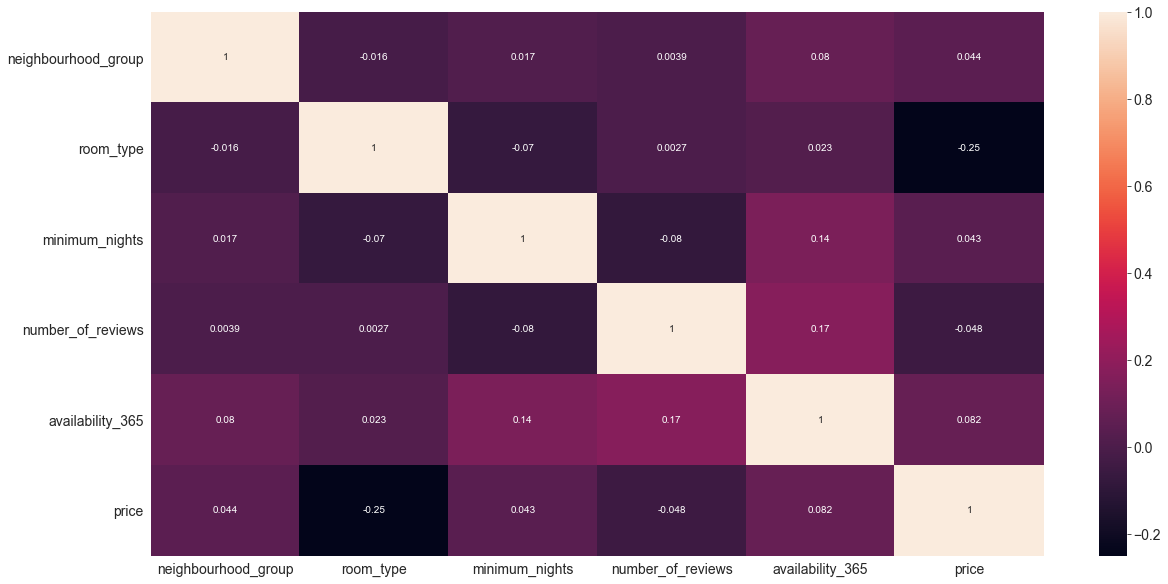

In [22]:
train_data = train_data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'availability_365', 'price']].dropna()
corr = train_data.corr()
sns.heatmap(corr, annot=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/beomus/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model.score(X_test, y_test)

0.051065939514129896

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

41977.69168319286